# Classification problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats

In [3]:
DATASET_PATH='./data/iris_dataset.csv'

In [4]:
data= pd.read_csv(DATASET_PATH,sep=' ,')
print("Shape of dataset: {}".format(data.shape))
data.head()

Shape of dataset: (150, 1)


C:\Users\lucar\AppData\Local\Temp\ipykernel_14460\3873047973.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data= pd.read_csv(DATASET_PATH,sep=' ,')


,"sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe"
0,"5.1,3.5,1.4,0.2,Iris-setosa"
1,"4.9,3,1.4,0.2,Iris-setosa"
2,"4.7,3.2,1.3,0.2,Iris-setosa"
3,"4.6,3.1,1.5,0.2,Iris-setosa"
4,"5,3.6,1.4,0.2,Iris-setosa"


In [5]:
data.iloc[:,4]

IndexError: single positional indexer is out-of-bounds

Verifico che non ci siano valori testuali nelle prime colonne

In [ ]:
print("Ci sono valori nulli nel dataset? {}".format(data.isnull().any().any()))

Ci sono valori nulli nel dataset? False


In [ ]:
print("Trovo la/le colonne aventi valori nulli:\n{}".format(data.isnull().any(axis=0)))


Trovo la/le colonne aventi valori nulli:
sepal_length_cm    False
sepal_width_cm     False
petal_length_cm    False
petal_width_cm     False
classe             False
dtype: bool


In [ ]:
print("Numero di valori nulli nella colonna 'petal_width_cm': {}".format(data.petal_width_cm.isnull().sum()))

Numero di valori nulli nella colonna 'petal_width_cm': 0


In [ ]:
print("Elementi in petal width cm:{}".format(sorted(data.petal_width_cm.unique(),reverse=True)))

Elementi in petal width cm:['NA            ', '2.5           ', '2.4           ', '2.3           ', '2.2           ', '2.1           ', '2             ', '1.9           ', '1.8           ', '1.7           ', '1.6           ', '1.5           ', '1.4           ', '1.3           ', '1.2           ', '1.1           ', '1             ', '0.6           ', '0.5           ', '0.4           ', '0.3           ', '0.2           ', '0.1           ']


In [ ]:
data.loc[data.petal_width_cm.isnull(),:]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe


In [ ]:
print("Valori in 'Classification':\n {}".format(data.classification.unique()))

AttributeError: 'DataFrame' object has no attribute 'classification'

In [ ]:
#Pulisco colonna Classification
data['classification'] = data['classification'].replace('Iris-setossa', 'Iris-setosa')
data['classification']=data['classification'].replace('versicolor','Iris-versicolor')
data['classification']=data['classification'].replace('Iris-versicolor class','Iris-versicolor')

In [ ]:
data.classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classification, dtype: int64

In [ ]:
data.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classification
count,150.000000,150.000000,150.000000,145.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.236552,NaN
std,1.312781,0.433123,1.764420,0.755058,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
from pandas.api.types import is_numeric_dtype

data=data.apply(lambda x: x.fillna(x.median())
               if is_numeric_dtype(x)
               else x.fillna(x.mode().iloc[0]))

In [ ]:
fig,axs= plt.subplots(2,2,figsize=(20,8))
sns.boxplot(x=data.sepal_length_cm,color='#808080',ax=axs[0,0])
sns.boxplot(x=data.petal_length_cm,ax=axs[0,1])
sns.boxplot(x=data.petal_width_cm,ax=axs[1,0])
sns.boxplot(x=data.sepal_width_cm,ax=axs[1,1])

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='classification', ylabel='petal_width_cm'>

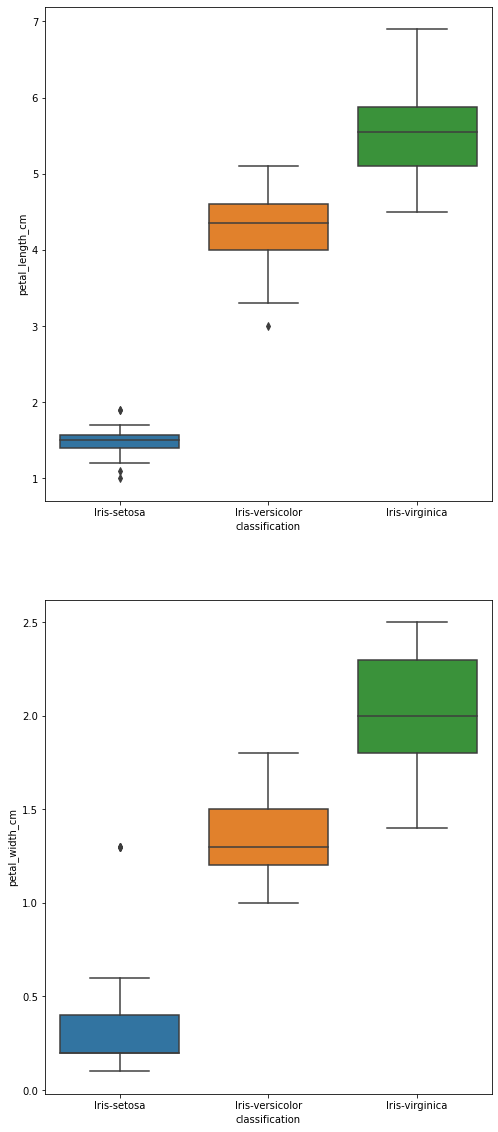

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,20))
sns.boxplot(x=data.classification,y=data.petal_length_cm,ax=axs[0])
sns.boxplot(x=data.classification,y=data.petal_width_cm,ax=axs[1])

In [ ]:
_=stats.mstats.winsorize(data.petal_length_cm,limits=0.05,inplace=True)
_=stats.mstats.winsorize(data.petal_width_cm,limits=0.05,inplace=True)

In [ ]:
data.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classification
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.743333,1.236000,NaN
std,1.312781,0.433123,1.727100,0.727991,NaN
min,0.055000,2.000000,1.300000,0.200000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<AxesSubplot:xlabel='classification', ylabel='petal_width_cm'>

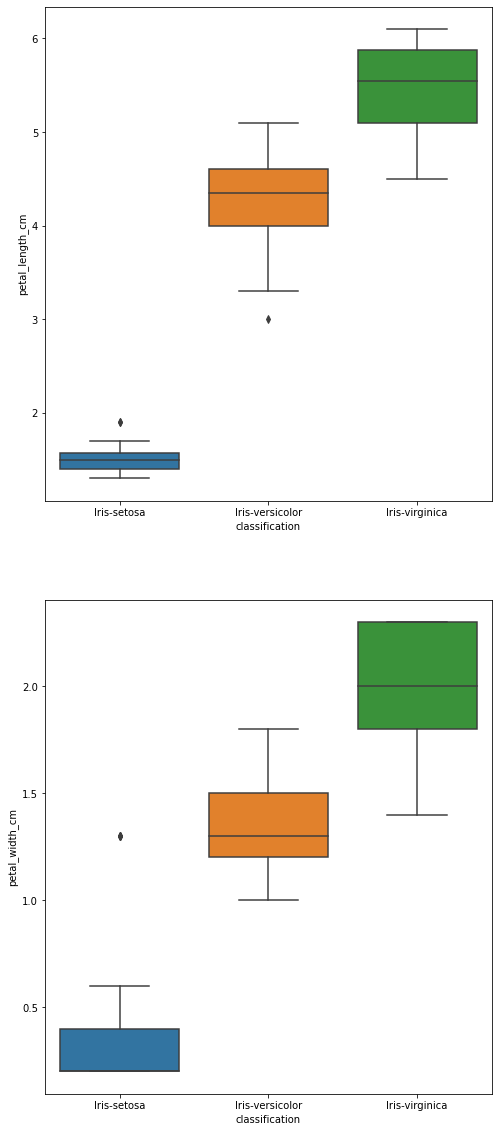

In [ ]:
#Non si sono tolti gli outliers
fig,axs=plt.subplots(2,1,figsize=(8,20))
sns.boxplot(x=data.classification,y=data.petal_length_cm,ax=axs[0])
sns.boxplot(x=data.classification,y=data.petal_width_cm,ax=axs[1])

In [ ]:
from sklearn.metrics import SCORERS
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.externals import joblib

In [ ]:
#Matrice delle features
X= data.iloc[:,:-1]
X.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Vettore label
y=data.classification
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: classification, dtype: object

# Training & Validate

In [ ]:
def evaluate(true_values,predicted_values):
    print("Accuracy {:.3f}".format(accuracy_score(true_values,predicted_values)))
    print("Area under ROC curve {:.3f}".format(roc_auc_score(true_values,predicted_values)))

In [ ]:
model_and_iperparameters= {'Logistic Regression': (LogisticRegression(solver='liblinear'), 
                                                 {'C': [0.01,0.05,0.1,0.5,1,2]})
                          }

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=32,stratify=y)
k_fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=30)

In [ ]:
model= model_and_iperparameters['Logistic Regression'][0]
iperparam= model_and_iperparameters['Logistic Regression'][1]

gs=GridSearchCV(estimator=model,param_grid=iperparam,scoring='accuracy',cv=k_fold,verbose=True, return_train_score=True)
gs.fit(X_train,y_train)
pd.DataFrame(gs.cv_results_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006893,0.003292,0.007385,0.008635,0.01,{'C': 0.01},0.666667,0.666667,0.666667,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,1.110223e-16
1,0.005690,0.001091,0.003198,0.001399,0.05,{'C': 0.05},0.666667,0.666667,0.666667,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.675926,0.666667,0.675926,0.669444,4.243126e-03
2,0.006219,0.002512,0.003564,0.001719,0.1,{'C': 0.1},0.833333,0.750000,0.666667,0.666667,...,0.722222,0.722222,0.722222,0.722222,0.712963,0.740741,0.722222,0.740741,0.728704,1.944444e-02
3,0.004098,0.001445,0.002698,0.001100,0.5,{'C': 0.5},0.916667,1.000000,0.916667,0.916667,...,0.953704,0.953704,0.944444,0.944444,0.953704,0.972222,0.953704,0.972222,0.952778,1.130237e-02
4,0.003198,0.000400,0.001800,0.000602,1,{'C': 1},0.916667,1.000000,0.916667,0.916667,...,0.953704,0.953704,0.953704,0.953704,0.953704,0.953704,0.953704,0.944444,0.950000,6.141898e-03
5,0.003598,0.001019,0.002298,0.001615,2,{'C': 2},0.916667,1.000000,0.916667,0.916667,...,0.953704,0.953704,0.944444,0.944444,0.953704,0.944444,0.972222,0.944444,0.950926,8.333333e-03


In [ ]:
print("Best Iperparameter: {}".format(gs.best_params_))
print("Best accuracy score: {}".format(gs.best_score_))
print()
# 3. Assess the quality of predictions made on the test set
print("Evaluate Performance on Test Set")
metrics.accuracy_score(y_test,gs.predict(X_test))
#evaluate(y_test,gs.predict(X_test))

Best Iperparameter: {'C': 0.5}
Best accuracy score: 0.9499999999999998

Evaluate Performance on Test Set


0.9333333333333333

In [ ]:
model= LogisticRegression(solver='liblinear')
k_fold=StratifiedKFold(n_splits=10,random_state=30,shuffle=True)
cv=cross_validate(model,X,y,cv=k_fold ,scoring="accuracy",return_train_score=True)
pd.DataFrame(cv)

,fit_time,score_time,test_score,train_score
0,0.006998,0.003999,0.933333,0.955556
1,0.007999,0.005185,0.933333,0.948148
2,0.003999,0.002998,0.933333,0.962963
3,0.005995,0.001999,1.000000,0.940741
4,0.005995,0.002002,0.933333,0.955556
5,0.002997,0.002002,1.000000,0.948148
6,0.002999,0.001997,1.000000,0.955556
7,0.001998,0.001998,0.933333,0.962963
8,0.003996,0.001999,1.000000,0.940741
9,0.002999,0.001999,0.933333,0.948148


In [ ]:
print("***** Evaluate Average Performance on Training Set *****")
print("Avg. Training Set Accuracy = {:.3f}".format(np.mean(cv['train_score'])))
print()
print("***** Evaluate Average Performance on Cross-Validation Set *****")
print("Avg. Test Set Accuracy = {:.3f}".format(np.mean(cv['test_score'])))


***** Evaluate Average Performance on Training Set *****
Avg. Training Set Accuracy = 0.952

***** Evaluate Average Performance on Cross-Validation Set *****
Avg. Test Set Accuracy = 0.960
